#***Global Air Pollution  Prediction***

#****Air Pollution Impact on Life: A Global Concern****
---

Saving Understanding the Impact_ Unveiling the Environmental Health Risks That Affect Our Well-being.jpeg to Understanding the Impact_ Unveiling the Environmental Health Risks That Affect Our Well-being.jpeg


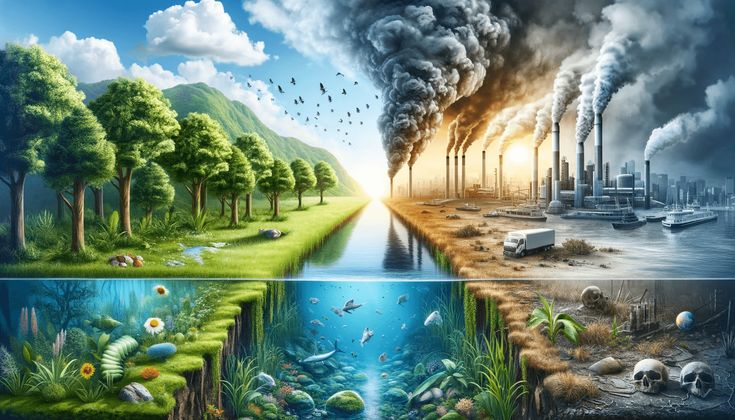

In [2]:

from google.colab import files
from IPython.display import Image

# Upload an image
uploaded = files.upload()

# Display the image
Image("Understanding the Impact_ Unveiling the Environmental Health Risks That Affect Our Well-being.jpeg")

#***Key Facts about Global Air Pollution***
- Air pollution is the leading environmental risk – responsible for about 7 million premature deaths annually worldwide. (WHO, 2023)

- Fine particulate matter (PM2.5) is the most dangerous pollutant as it penetrates deep into lungs and blood. (WHO, UNEP)

- Over 90% of the world’s population breathes air that exceeds WHO guideline limits. (WHO, 2022)

- Low- and middle-income countries face the highest exposure, especially in Asia and Africa. (World Bank, 2022)

- Indoor air pollution from cooking with solid fuels affects 2.4 billion people globally. (WHO, 2023)

##***Problem Statement:***
---

###Air pollution is a critical global issue that directly impacts human health, environment, and climate change. Predicting the Air Quality Index (AQI) category based on pollutants such as CO, Ozone, NO2, and PM2.5 can help governments and individuals take preventive actions. This project aims to classify global air pollution levels into categories (Moderate,Good,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous) using machine learning algorithms.

#Stage 1

## Dataset Selection with intial EDA


### Source / Timeline / Location

    Source :Kaggle (Global Air Pollution prediction dataset)

    Timeline: 2015 – 2023

    Location: Global (multiple countries)

### Type of Probeem
Regression / Classification

    Classification

###Domain:

    Environmental Data Science

## Possible algorithms planned to use
- Logistic Regression
- Decision trees
- K-Nearest Neighbors (KNN)
-  XGBoost Classifier
-  Support Vector Machine (SVM)

## Dataset Description

***Country***

- The name of the country where the air quality data was collected.

***City***

- The name of the city within the country where the measurement was taken.

***AQI Value***

- The overall Air Quality Index (AQI) numerical value, calculated from multiple pollutants.

***AQI Category***

- The air quality level based on AQI Value.

***CO AQI Value***

- The AQI sub-value calculated for Carbon Monoxide (CO) pollution levels.

***CO AQI Category***

- The pollution level category for CO.

***Ozone AQI Value***

The AQI sub-value calculated for Ozone (O₃) concentration.

***Ozone AQI Category***

- The pollution level category for Ozone.

***NO2 AQI Value***

- The AQI sub-value calculated for Nitrogen Dioxide (NO₂) levels.

***NO2 AQI Category***

- The pollution level category for NO₂.

***PM2.5 AQI Value***

- The AQI sub-value calculated for Particulate Matter (PM2.5) concentration (tiny dust particles harmful to health).

***PM2.5 AQI Category***

- The pollution level category for PM2.5.

## I choosen what target and features

Target Feature :

    AQI Category

Input Features :

    Country, City, CO AQI Value, Ozone AQI Value, NO2 AQI Value, PM2.5 AQI Value.

###***Objective***
- To build a machine learning model that predicts the Air Quality Index (AQI) category.



###***Outcome***

- A classification model that predicts whether air quality is Good / Moderate / Unhealthy etc.

## Initial EDA

In [3]:
#Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load Dataset
df = pd.read_csv("https://github.com/Selvamanit2/Final_project_dataset/raw/refs/heads/main/global%20air%20pollution%20dataset.csv.zip")
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [4]:
#copy of df
df1 = df.copy()

In [5]:
#Dataset Information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [6]:
#summary of descr bc b bh hj uhhh bub huh bbbbjbbbbhri cf dc v vc cv vu j rrv  ptive statistics
df1.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


###***Observation:***
- Maximum AQI Value is 500
- Minimum AQI Value is 6
- Maximum  Carbon Monoxide AQI Value is 133
- 50% of  Carbon Monoxide AQI Value is 1


In [7]:
#DataSet shape
df1.shape
#Columns = 12
#Records = 23,463

(23463, 12)

In [8]:
#Display null values
df1.isnull().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [9]:
#Any duplicate
df1.duplicated().sum()


np.int64(0)

# Stage 2

In [10]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None


In [11]:
print(df1.describe())

          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23463.000000  23463.000000     23463.000000   23463.000000   
mean      72.010868      1.368367        35.193709       3.063334   
std       56.055220      1.832064        28.098723       5.254108   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


## Handling missing values

In [12]:
#country missing values handling
df1["Country"] =df1["Country"].fillna(df1["Country"].mode()[0])

In [13]:
#city missing values handling
df1["City"] =df1["City"].fillna(df1["City"].mode()[0])

In [14]:
#checking mising values are clear
df1.isna().sum()

,0
Country,0
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


###***Explanation:***
- I use mode bacause mode was Replaces missing values with the mot frequent value of each column

In [15]:
#check unique value
df1['City'].unique()

array(['Praskoveya', 'Presidente Dutra', 'Priolo Gargallo', ...,
       'Mormugao', 'Westerville', 'Marang'], dtype=object)

In [16]:
#check value counts
df1['Country'].value_counts()

,count
Country,
United States of America,3299
India,2488
Brazil,1562
Germany,1345
Russian Federation,1241
...,...
Bahrain,1
Seychelles,1
State of Palestine,1


In [17]:
#check unique value
df1['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [18]:
df1['AQI Category'].value_counts()

,count
AQI Category,
Good,9936
Moderate,9231
Unhealthy,2227
Unhealthy for Sensitive Groups,1591
Very Unhealthy,287
Hazardous,191


###***Explanation:***
AQI Category	value count check
---
- ***Good***  was have ***9936***
- ***Moderate*** was have ***9231***
- ***Unhealthy*** was have ***2227***
- ***Unhealthy for Sensitive Groups*** was have ***1591***
- ***Very Unhealthy*** was have ***287***
- ***Hazardous*** was have ***191***

***In the checking value count we have Maximum air quality was "Good"***
---
___
***Minimum Air Quality was "Hazardous" it's highly "Affecting people"***
---
___

#Outliers and Skewness

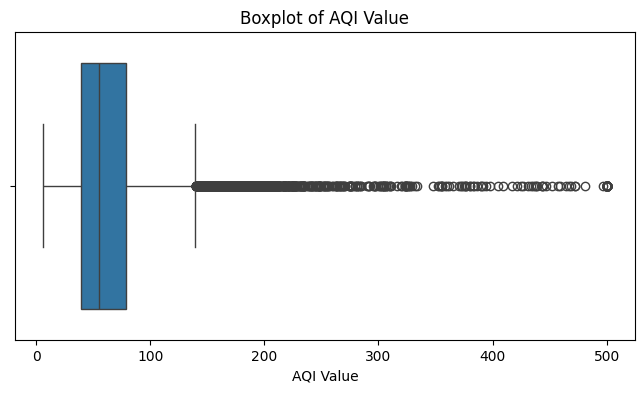

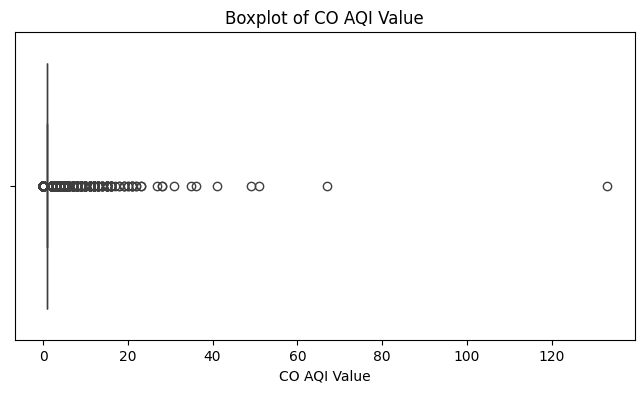

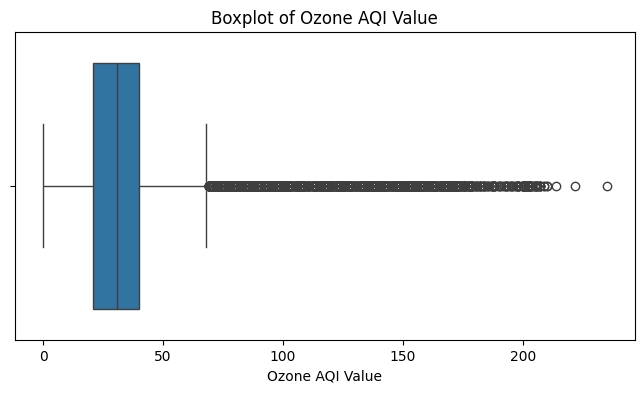

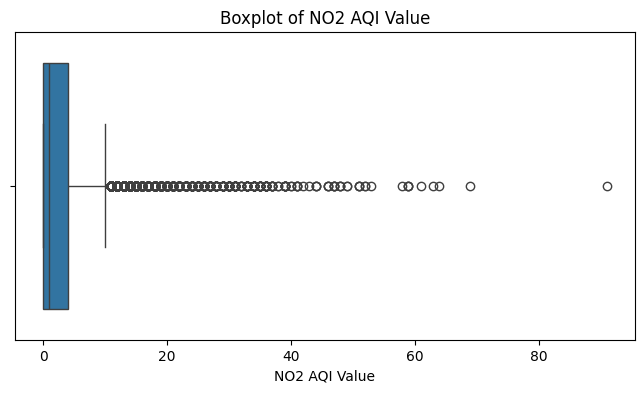

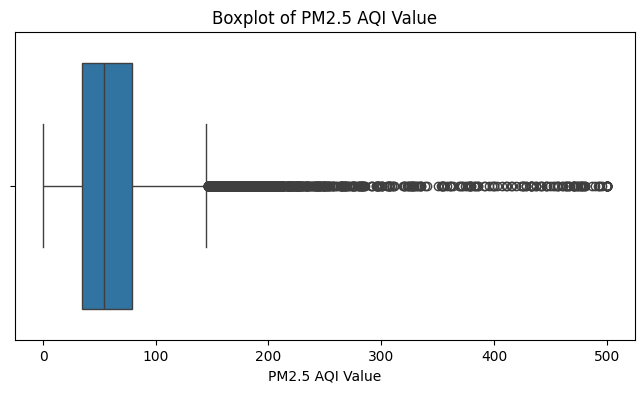

In [19]:
Outlier_column = ["AQI Value","CO AQI Value","Ozone AQI Value","NO2 AQI Value","PM2.5 AQI Value"]
for col in Outlier_column:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x= df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

###***Explanation boxplot:***
- we have outlier are AQL value 150 to 500
- Co AQL value are 0 to 120 above
- Ozone AQI Value are 60 to 200 above
- NO2 AQL value are 10 to 80 above
- PM2.5 AQL value are 150 to 500

###***Handling outliers with IQR***

In [20]:
df1.shape #this is before outliers removed dataset shape

(23463, 12)

In [21]:
Outlier_column = ["AQI Value","CO AQI Value","Ozone AQI Value","NO2 AQI Value","PM2.5 AQI Value"]
#useforloop
for col in Outlier_column:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1= df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

In [22]:
df1.shape #this is after outlier removed datasetshape

(12742, 12)

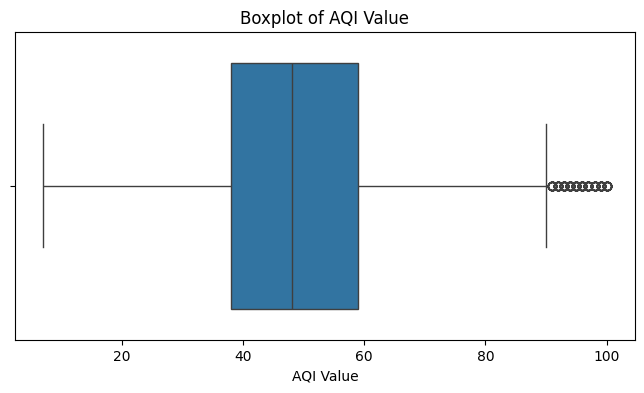

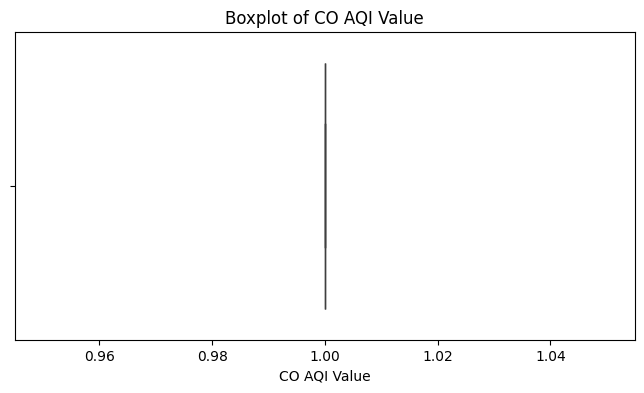

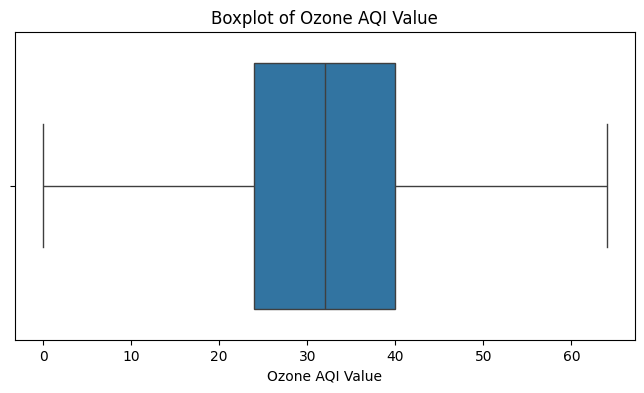

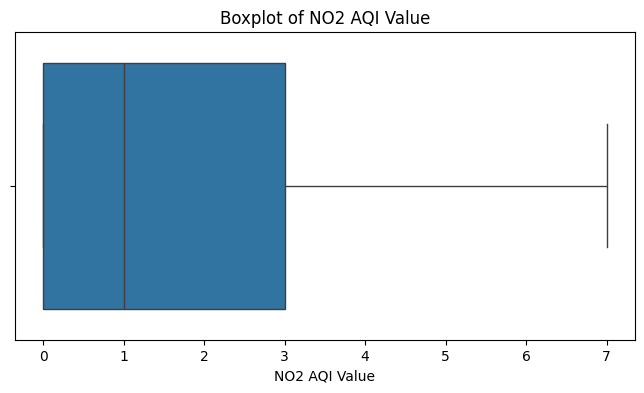

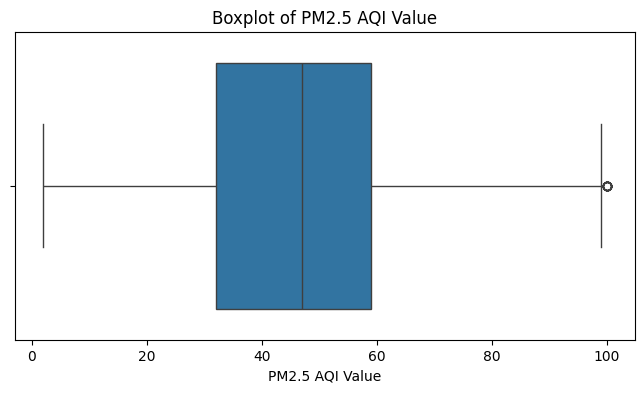

In [23]:
Outlier_column = ["AQI Value","CO AQI Value","Ozone AQI Value","NO2 AQI Value","PM2.5 AQI Value"]
for col in Outlier_column:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x= df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

###***After outlier removed boxplot explanation:***
 *After i use IQR method Removed the outliers*
- AQI Value are 150 t0 500 After outlier removed  Reduction from 90 to 100
- Co AQL value are 0 to 120 above  After outlier removed  Reduce 1.00
- Ozone AQI Value are 60 to 200 above  After outlier removed Reduce under 60
- NO2 AQL value are 10 to 80 above After outlier removed  Reduce under 7
- PM2.5 AQL value are 150 to 500 After outlier removed  Reduce under 100

###***Before remove outliers Orginal Skewness:***

In [24]:
from scipy.stats import skew

In [25]:
original_skewnes1 = df["AQI Value"].skew()
print("original skewness for AQI Value:",original_skewnes1)

original skewness for AQI Value: 3.2889126222707357


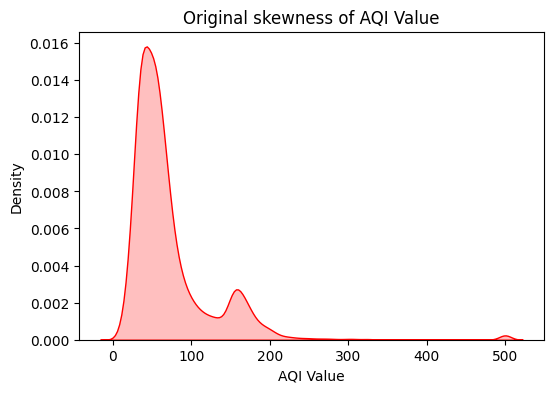

In [26]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['AQI Value'], color="red",fill =True)
plt.title('Original skewness of AQI Value')
plt.show()

In [27]:
original_skewnes2 = df["CO AQI Value"].skew()
print("original skewness for CO AQI Value:",original_skewnes2)

original skewness for CO AQI Value: 23.084232216858382


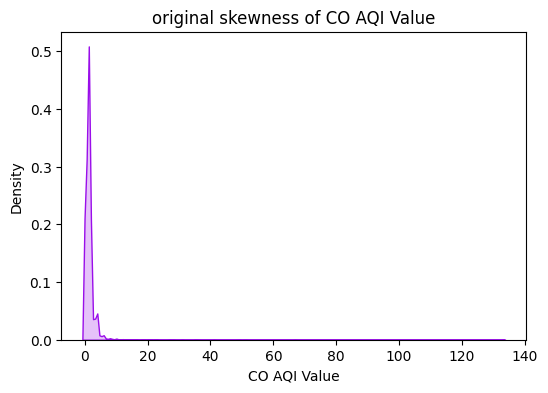

In [28]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['CO AQI Value'], color="#9a0eea",fill =True)
plt.title('original skewness of CO AQI Value')
plt.show()

In [29]:
original_skewnes3 = df["Ozone AQI Value"].skew()
print("original skewness for Ozone AQI Value:",original_skewnes3)

original skewness for Ozone AQI Value: 3.101750386086197


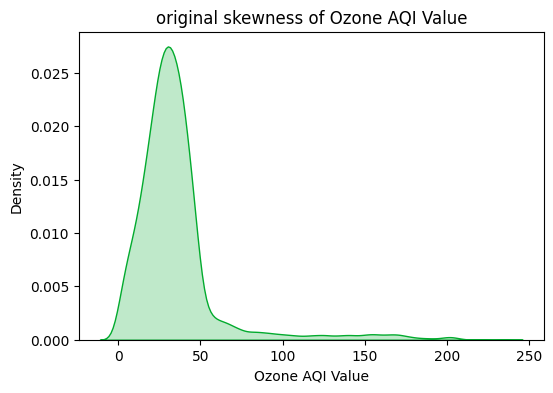

In [30]:
plt.figure(figsize=(6,4))
sns.kdeplot(df["Ozone AQI Value"],color="#02ab2e",fill =True)
plt.title('original skewness of Ozone AQI Value')
plt.show()

In [31]:
original_skewnes4 = df["NO2 AQI Value"].skew()
print("original skewness for Ozone AQI Value:",original_skewnes4)

original skewness for Ozone AQI Value: 3.793627544162518


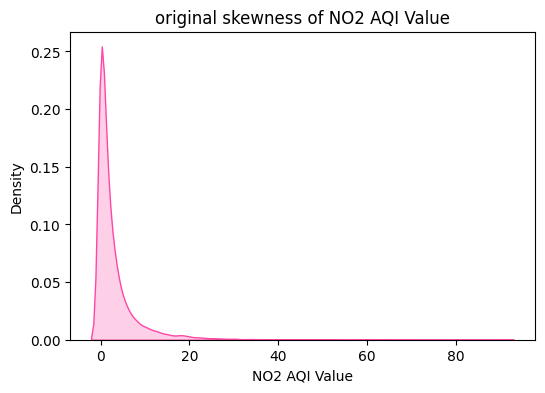

In [32]:
plt.figure(figsize=(6,4))
sns.kdeplot(df["NO2 AQI Value"],color="#fe46a5",fill =True)
plt.title('original skewness of NO2 AQI Value')
plt.show()

In [33]:
original_skewnes5 = df["PM2.5 AQI Value"].skew()
print("original skewness for PM2.5 AQI Value:",original_skewnes5)

original skewness for PM2.5 AQI Value: 2.8232624208975357


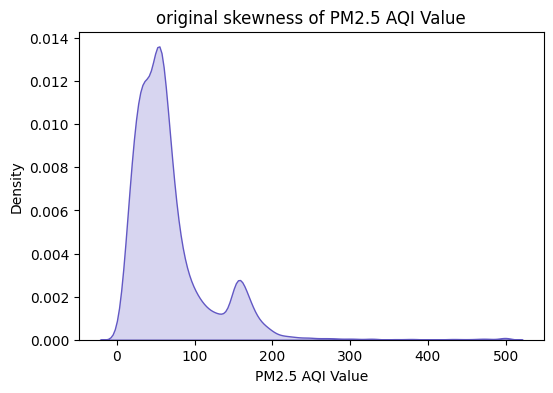

In [34]:
plt.figure(figsize=(6,4))
sns.kdeplot(df["PM2.5 AQI Value"],color="#6258c4",fill =True)
plt.title('original skewness of PM2.5 AQI Value')
plt.show()

_____

###***After removed outliers skewness:***
***I use squard root tranformation***

In [35]:
outliers_removed_skewnes1 = df1["AQI Value"].skew()
print("outliers removed skewness for AQI Value:",outliers_removed_skewnes1)

outliers removed skewness for AQI Value: 0.5985628747002767


In [36]:
squard_df1 =  df1["AQI Value"]**0.5
skewnessscorenew1 = squard_df1.skew()
skewnessscorenew1

np.float64(0.16794349328315555)

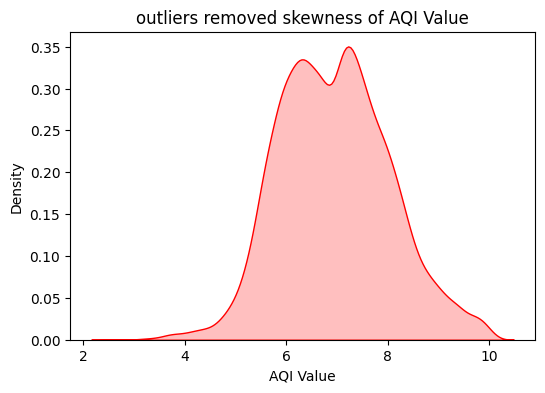

In [37]:
plt.figure(figsize=(6,4))
sns.kdeplot(squard_df1, color="red",fill =True)
plt.title('outliers removed skewness of AQI Value')
plt.show()

In [38]:
outliers_removed_skewnes2 = df1["CO AQI Value"].skew()
print("outliers removed skewness for CO AQI Value:",outliers_removed_skewnes2)

outliers removed skewness for CO AQI Value: 0.0


In [39]:
squard_df2 =  df1["CO AQI Value"]**0.5
skewnessscorenew2 = squard_df2.skew()
skewnessscorenew2

np.float64(0.0)

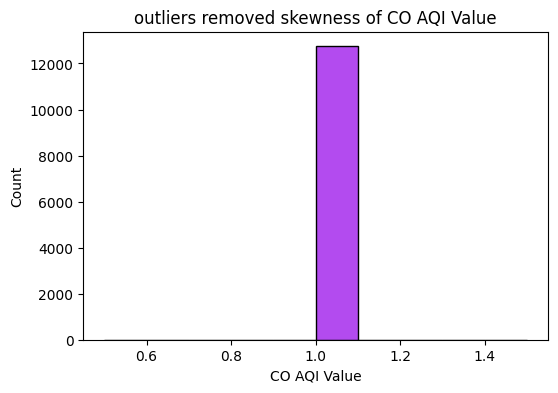

In [40]:
plt.figure(figsize=(6,4))
sns.histplot(squard_df2, color="#9a0eea", bins=10)
plt.title('outliers removed skewness of CO AQI Value')
plt.show()

In [41]:
print(df1["CO AQI Value"].unique())
print(df1["CO AQI Value"].nunique())

[1]
1


***outliers removed skewness for CO AQI Value is 0.0***
---
- ***if skewness = 0.0 its means data is perfect so i cannot plot kde so i use histplot***

In [42]:
outliers_removed_skewnes3 = df1["Ozone AQI Value"].skew()
print("outliers removed skewness for Ozone AQI Value:",outliers_removed_skewnes3)

outliers removed skewness for Ozone AQI Value: -0.20244341352330322


In [43]:
squard_df3 =  df1["Ozone AQI Value"]**0.5
skewnessscorenew3 = squard_df3.skew()
skewnessscorenew3

np.float64(-0.9731202989532411)

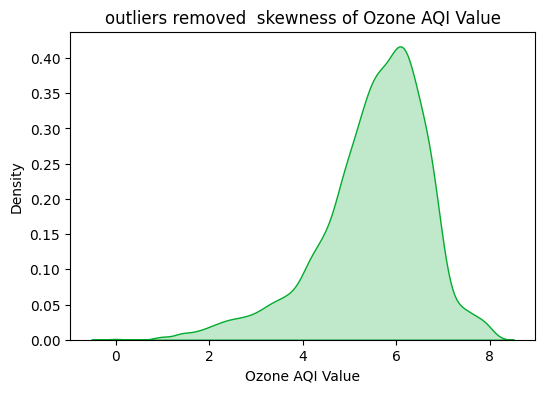

In [44]:
plt.figure(figsize=(6,4))
sns.kdeplot(squard_df3,color="#02ab2e",fill =True)
plt.title('outliers removed  skewness of Ozone AQI Value')
plt.show()

In [45]:
outliers_removed_skewnes4 = df1["NO2 AQI Value"].skew()
print("outliers removed skewness for Ozone AQI Value:",outliers_removed_skewnes4)

outliers removed skewness for Ozone AQI Value: 1.1055676611076226


In [46]:
squard_df4 =  df1["NO2 AQI Value"]**0.5
skewnessscorenew4 = squard_df4.skew()
skewnessscorenew4

np.float64(0.12206309082047848)

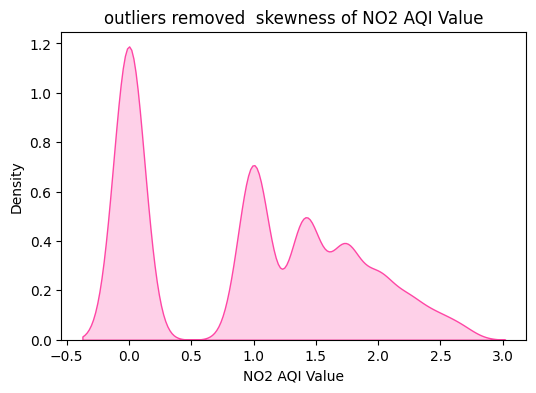

In [47]:
plt.figure(figsize=(6,4))
sns.kdeplot(squard_df4,color="#fe46a5",fill =True)
plt.title('outliers removed  skewness of NO2 AQI Value')
plt.show()

In [48]:
outliers_removed_skewnes5 = df1["PM2.5 AQI Value"].skew()
print("outliers removed skewness for PM2.5 AQI Value:",outliers_removed_skewnes5)

outliers removed skewness for PM2.5 AQI Value: 0.19005713112823006


In [49]:
squard_df5 =  df1["PM2.5 AQI Value"]**0.5
skewnessscorenew5 = squard_df5.skew()
skewnessscorenew5

np.float64(-0.37408202888423125)

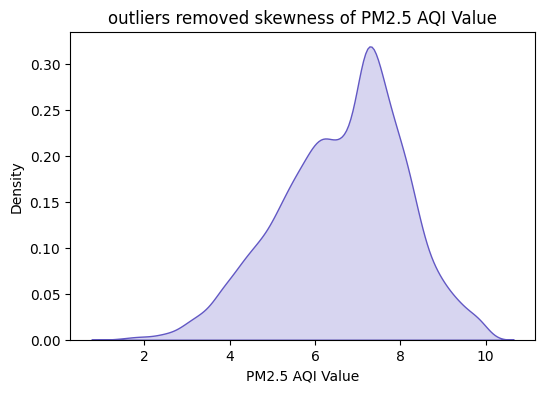

In [50]:
plt.figure(figsize=(6,4))
sns.kdeplot(squard_df5,color="#6258c4",fill =True)
plt.title('outliers removed skewness of PM2.5 AQI Value')
plt.show()

In [51]:
data = { "original skewness":[3.28,23.08,3.10,3.79, 2.82],
         "outliers_removed_skewness" :[0.59, 0.0, -0.20,1.10, 0.19],
         "squard_root_tranform":[0.16, 0.0,-0.97,0.12,-0.37]}
before_vs_after = pd.DataFrame(data,index=[1,2,3,4,5])
before_vs_after

,original skewness,outliers_removed_skewness,squard_root_tranform
1,3.28,0.59,0.16
2,23.08,0.00,0.00
3,3.10,-0.20,-0.97
4,3.79,1.10,0.12
5,2.82,0.19,-0.37


***In the comparison after outliers removed skewness Reduce***

***0  --> Skewness Perfect data***


***-0.5 t0 0.5 Mild Skewness we can ignore it***

***i use squard root tranformation so skewness hightly Reduce***


#***Data Visualization***
###***Univariate analysis:***

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12742 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             12742 non-null  object
 1   City                12742 non-null  object
 2   AQI Value           12742 non-null  int64 
 3   AQI Category        12742 non-null  object
 4   CO AQI Value        12742 non-null  int64 
 5   CO AQI Category     12742 non-null  object
 6   Ozone AQI Value     12742 non-null  int64 
 7   Ozone AQI Category  12742 non-null  object
 8   NO2 AQI Value       12742 non-null  int64 
 9   NO2 AQI Category    12742 non-null  object
 10  PM2.5 AQI Value     12742 non-null  int64 
 11  PM2.5 AQI Category  12742 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.3+ MB


###***AQI Category Counts Visualization***

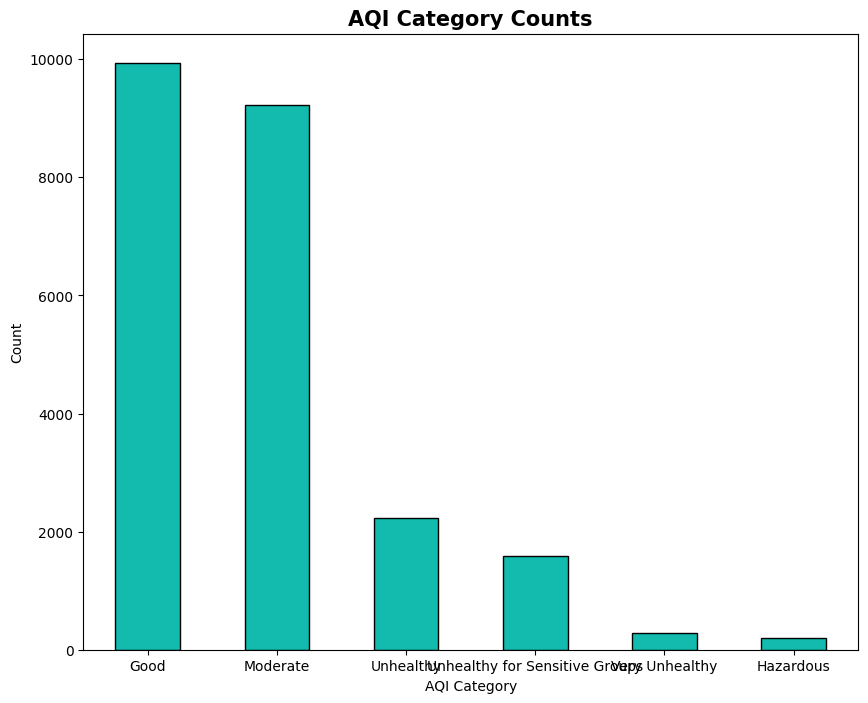

In [53]:
plt.figure(figsize=(10,8))
df["AQI Category"].value_counts().plot(kind="bar", color="#13bbaf", edgecolor="black")
plt.title("AQI Category Counts",fontsize=15, fontweight='bold')
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

***Interpretation:***
---
- The majority of the data points fall into the "Good" and "Moderate" air quality categorie with "Good" being the most frequent.  
- Unhealthy, "Unhealthy for Sensitive Groups," and "Hazardous" categories are significantly lower.


###***Distribution of PM2.5 AQI Value Visualization***

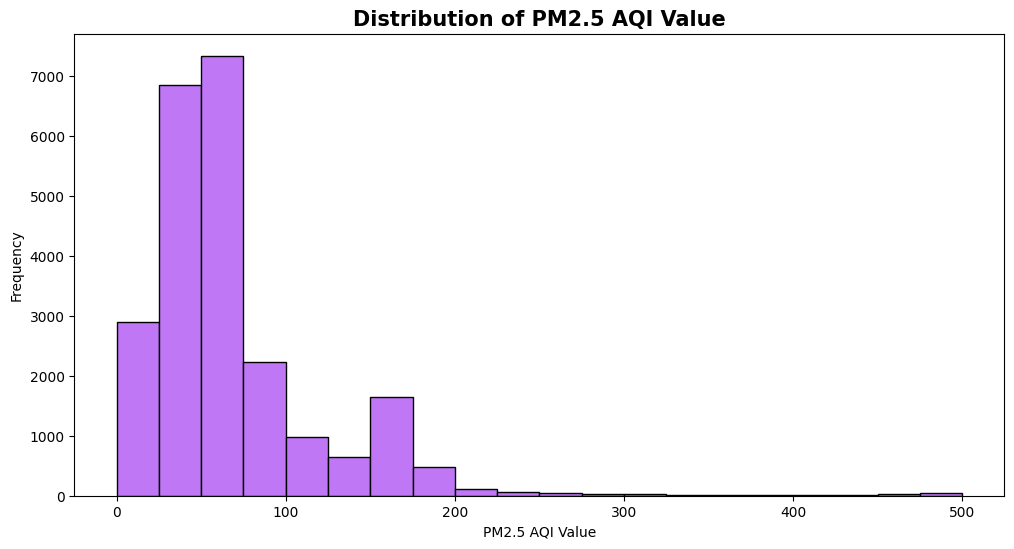

In [54]:
plt.figure(figsize=(12,6))
plt.hist(df["PM2.5 AQI Value"], bins=20, edgecolor="black", color='#bf77f6')
plt.title("Distribution of PM2.5 AQI Value",fontsize=15, fontweight='bold')
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("Frequency")
plt.show()

***Interpretation:***
---
- As the AQI value increases, the frequency of observations drops significantly, with very few instances of high pollution levels (AQI values above 200).
 - The highest frequency of values is 7000 above


###***Distribution of AQI Value Visualization***

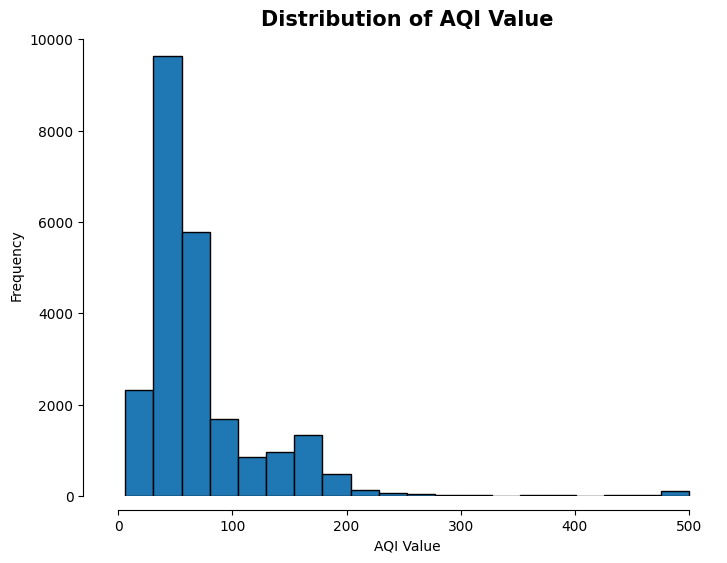

In [55]:
plt.figure(figsize=(8,6))
plt.hist(df["AQI Value"], bins=20, edgecolor="black")
plt.title("Distribution of AQI Value",fontsize=15, fontweight='bold')
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
sns.despine(offset=10, trim=True)
plt.show()

***Interpretation:***
---
- The data is heavily concentrated at the lower end of the Air Quality Index scale.
- The peak frequency occurs for AQI values between 50 and 75, with a very high number of observations.
- As the AQI value increases, the frequency drops sharply, indicating that good to moderate air quality is the most common condition, and high pollution events are rare.

###***Top 10 Countries Visualization***

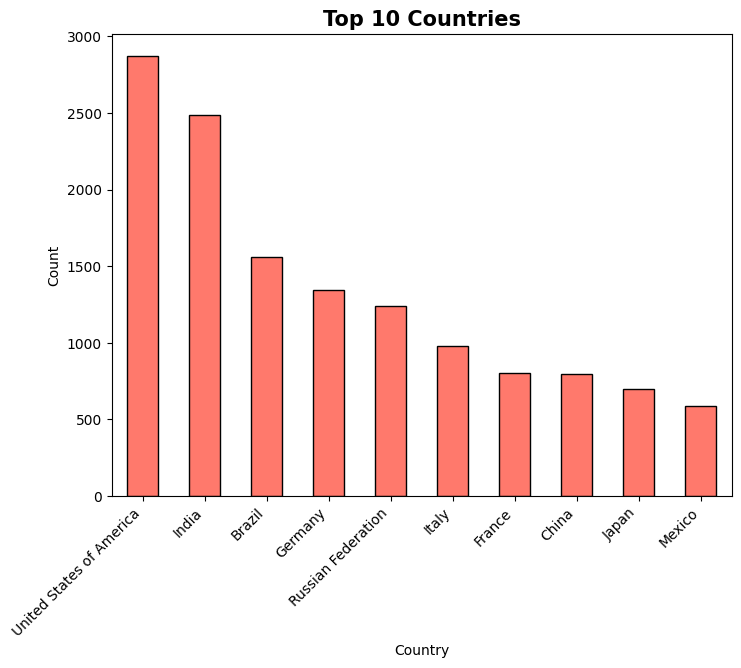

In [56]:
plt.figure(figsize=(8,6))
df["Country"].value_counts().head(10).plot(kind="bar", color='#ff796c', edgecolor="black")
plt.title("Top 10 Countries",fontsize=15, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

***Interpretation:***
---
-  The United States of America has the highest count, followed by India and then Brazil.
- This suggests that these three countries have the highest recorded instances or measurements of the variable being tracked in the dataset.
- As the AQI value increases beyond 100, the frequency of occurrences decreases significantly, suggesting that high pollution events are rare.

 *BIVARIATE*

###***PM2.5 vs NO2 AQI Values Visualization***

/tmp/ipython-input-1216083188.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df["PM2.5 AQI Value"], df["NO2 AQI Value"], alpha=0.6, cmap='magma',marker='p')


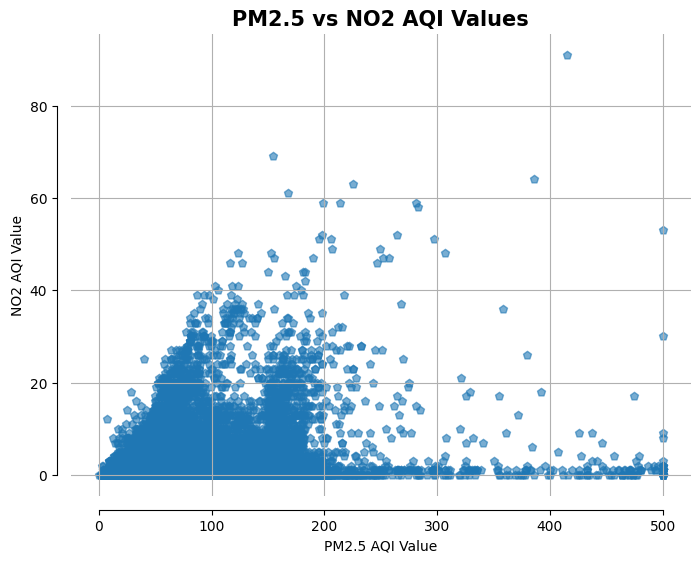

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(df["PM2.5 AQI Value"], df["NO2 AQI Value"], alpha=0.6, cmap='magma',marker='p')
plt.title("PM2.5 vs NO2 AQI Values",fontsize=15, fontweight='bold')
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("NO2 AQI Value")
plt.grid(True)
sns.despine(offset=10, trim=True)
plt.show()

***Interpretation:***
---
- The plot shows a positive correlation between PM2.5 and NO2 AQI at lower pollution levels.
- The vast majority of the data points are clustered in the lower-left corner of the graph, indicating that most of the time, both PM2.5 and NO2 values are low.
- Higher PM2.5 AQI values (above approximately 200), there is little to no correlation with NO2 AQI.
- The NO2 values remain predominantly low, even when the PM2.5 levels are very high.
- This suggests that high PM2.5 pollution events are often not accompanied by a corresponding increase in NO2 pollution.

###***AQI Value Distribution by Category Visualization***

/tmp/ipython-input-4206623580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AQI Category", y="AQI Value", data=df, palette="husl")


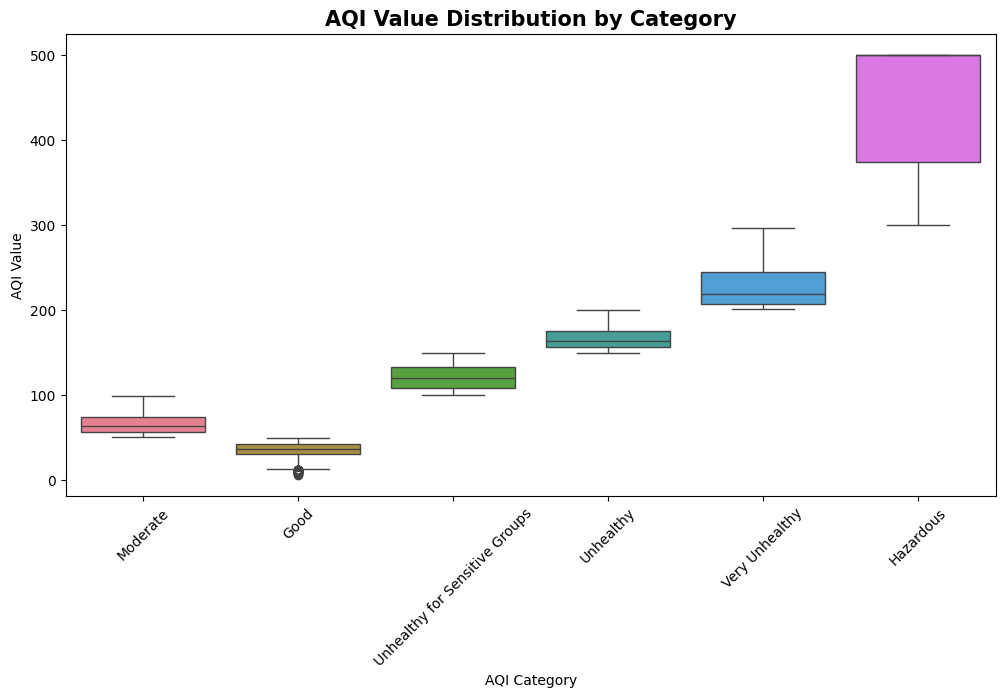

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x="AQI Category", y="AQI Value", data=df, palette="husl")
plt.title("AQI Value Distribution by Category",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

***Interpretation:***
---
-  The "Good" and "Moderate" categories have the lowest AQI values.
- Their boxes are narrow and located at the bottom of the plot, indicating that these categories represent a relatively small and tightly clustered range of low pollution levels.
- The "Good" category also shows a single outlier with a slightly higher AQI value.
- The "Unhealthy for Sensitive Groups" and "Unhealthy" categories show a wider range of values than the "Good" and "Moderate" categories.
-  The "Very Unhealthy" category has an even broader range, and the "Hazardous" category has the largest and highest-positioned box, indicating a huge spread of extremely high and dangerous AQI values.


###***Top 10 Countries by Average AQI Value  Visualization***



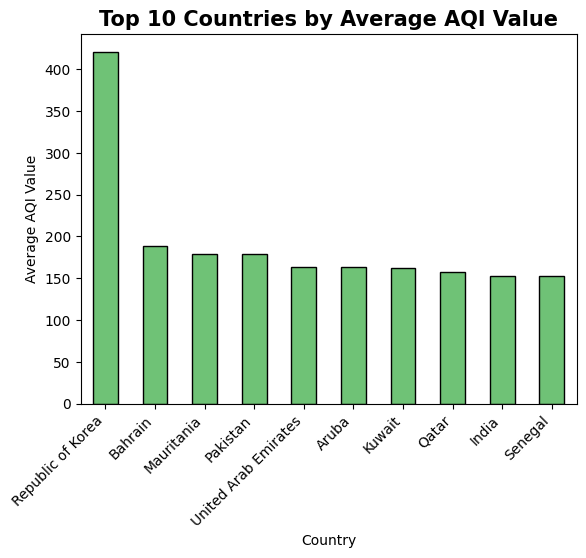

In [59]:
df.groupby("Country")["AQI Value"].mean().nlargest(10).plot(kind="bar", color='#6fc276', edgecolor="black")
plt.title("Top 10 Countries by Average AQI Value",fontsize=15, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Average AQI Value")
plt.xticks(rotation=45, ha="right")
plt.show()

***Interpretation:***
---
-  The Republic of Korea has the highest average AQI, followed by Bahrain, Mauritania, and Pakistan.
- The US, India, and Brazil may have a high volume of data, the average pollution levels are not the highest globally.

*MULTIVARIATE*

###***Correlation Heatmap of AQI Values Visualization***

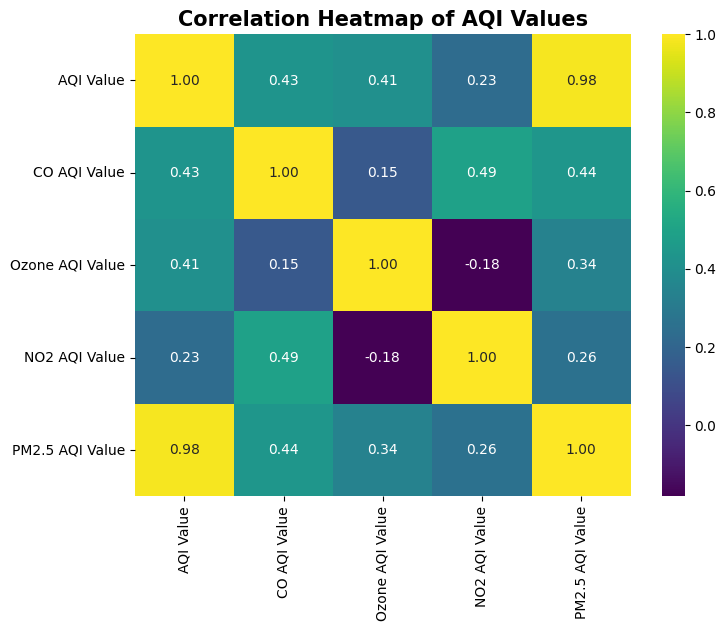

In [60]:
aqi_values = df[["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]]
plt.figure(figsize=(8,6))
sns.heatmap(aqi_values.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap of AQI Values",fontsize=15, fontweight='bold')
plt.show()

***Interpretation:***
---
- The strongest correlation is a near-perfect 0.98 between the PM2.5 AQI Value and the overall AQI Value.
-  This indicates that PM2.5 is the primary factor determining the overall AQI value in this dataset.

###***AQI Category Distribution in Top 5 Countries  Visualization***

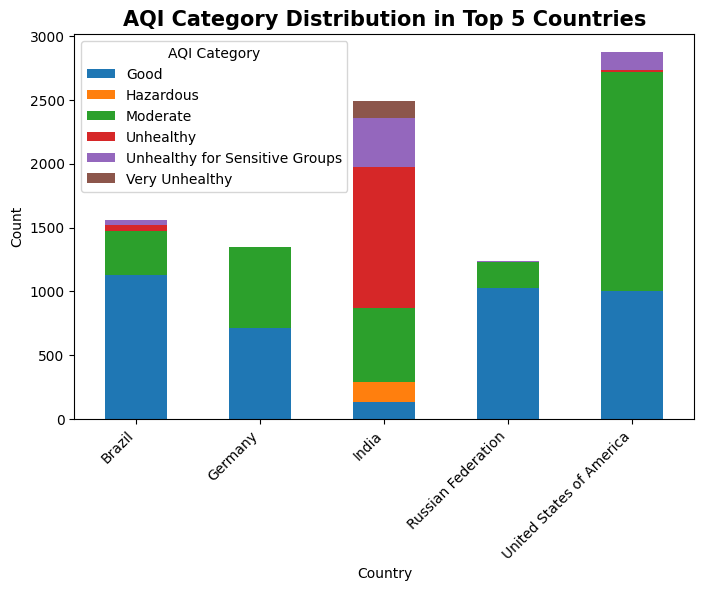

In [61]:
top5 = df["Country"].value_counts().head(5).index
stacked = df[df["Country"].isin(top5)].groupby(["Country", "AQI Category"]).size().unstack(fill_value=0)
stacked.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("AQI Category Distribution in Top 5 Countries",fontsize=15, fontweight='bold')
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

***Interpretation:***
---
- The United States of America, India, and Brazil have the highest counts.
- This particular chart reflects data collection volume rather than average pollution levels.
* India and the United States have the largest total counts of data points, with the US having the highest overall.

 * Brazil, Germany, and the Russian Federation have lower total counts.

 * The chart shows the distribution of air quality categories within each country. For example, the United States has a very high count of "Good" and "Moderate" air quality days, which contributes to its overall high count.

 * India, in contrast, has a significant number of data points in the "Unhealthy," "Unhealthy for Sensitive Groups," and "Very Unhealthy" categories, indicating more frequent periods of poor air quality compared to the other top countries.

#Stage 3


##Feature Selection and Model Building (using multiple models)

###Feature Engineering

***using LabelEncoding***


In [62]:
df1.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate


In [63]:
df1.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [64]:
from sklearn.preprocessing import LabelEncoder
Categorical_Features = ['Country','City','AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category']
le = LabelEncoder()
for col in Categorical_Features:
  df1[col] = le.fit_transform(df1[col])
df1.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,113,8837,51,1,1,0,36,0,0,0,51,1
1,19,8851,41,0,1,0,5,0,1,0,41,0
2,68,8874,66,1,1,0,39,0,2,0,66,1
3,108,8903,34,0,1,0,34,0,0,0,20,0
6,52,8970,62,1,1,0,35,0,3,0,62,1


In [65]:
df1['AQI Category'].unique()

array([1, 0, 2])

In [66]:
print(list(enumerate(le.classes_)))

[(0, 'Good'), (1, 'Moderate'), (2, 'Unhealthy for Sensitive Groups')]


In [67]:
df1['AQI Category'].value_counts()

,count
AQI Category,
0,7123
1,5603
2,16


###Feature Selection



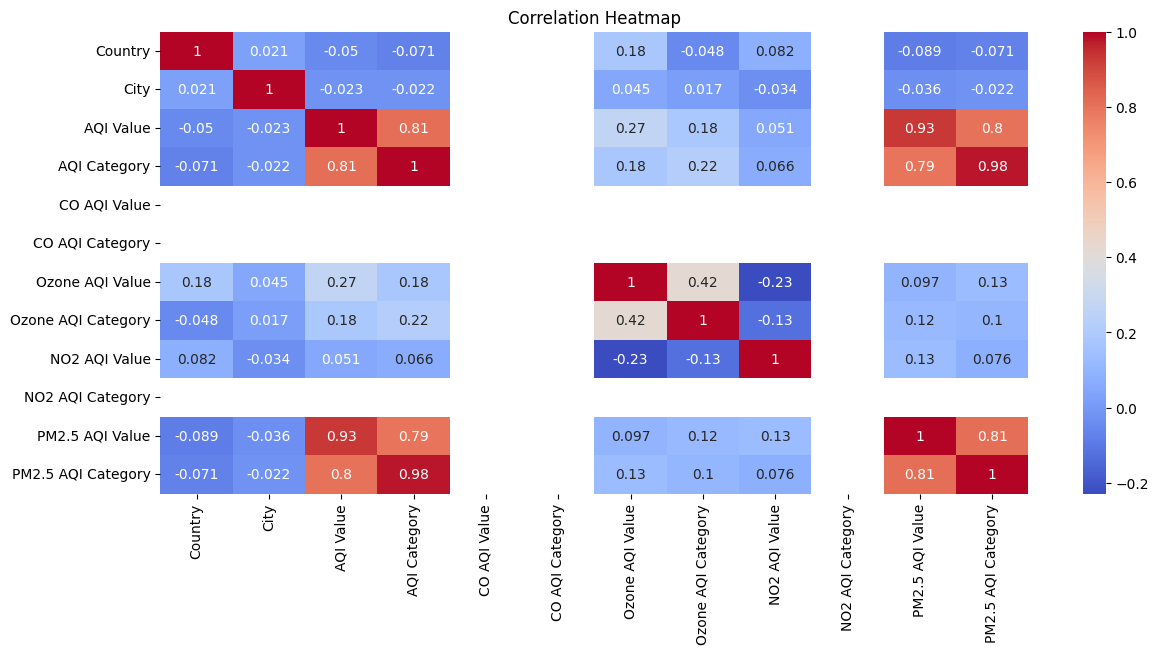

In [68]:
correlation_df = df1.corr()
# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

###***Interpretation***
*Very Strong Positive Correlations*

- ​The most significant relationships are a few very strong positive correlations, indicated by the dark red squares with values close to 1

-  AQI Value and AQI Category (0.81): There is a very strong positive correlation between the "AQI Value" and "AQI Category."

- This makes perfect sense, as the AQI (Air Quality Index) value directly determines its category (e.g., Good, Moderate, Unhealthy).

- As the numerical AQI value goes up, it moves into a higher, more polluted category.
- ​PM2.5 AQI Value and PM2.5 AQI Category (0.98): This is an almost perfect positive correlation.
- The "PM2.5 AQI Value" and its corresponding "Category" are tightly linked. This is expected, as PM2.5 levels are a primary factor used to calculate and categorize the overall AQI.

- ​PM2.5 AQI Value and AQI Value (0.93): There is a very strong positive correlation between the "PM2.5 AQI Value" and the general "AQI Value."
- This indicates that PM2.5 is a major driver of the overall air quality index. When PM2.5 levels are high, the overall AQI value is also high, suggesting poor air quality.

In [69]:
X=df1.drop(columns=['AQI Value','AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category','PM2.5 AQI Value'])
X.head()

,Country,City,CO AQI Value,Ozone AQI Value,NO2 AQI Value
0,113,8837,1,36,0
1,19,8851,1,5,1
2,68,8874,1,39,2
3,108,8903,1,34,0
6,52,8970,1,35,3


In [70]:
y = df1['AQI Category'] # Target
y.head()

,AQI Category
0,1
1,0
2,1
3,0
6,1


In [71]:
df1.shape

(12742, 12)

###Data Splitting:

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
#Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=42)
print(f"Dataset shape : {df1.shape}")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

Dataset shape : (12742, 12)
X_train shape : (10193, 5)
X_test shape : (2549, 5)
y_train shape : (10193,)
y_test shape : (2549,)


###Feature Scaling:

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,recall_score,precision_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

#***LogisticRegression Model Building:***

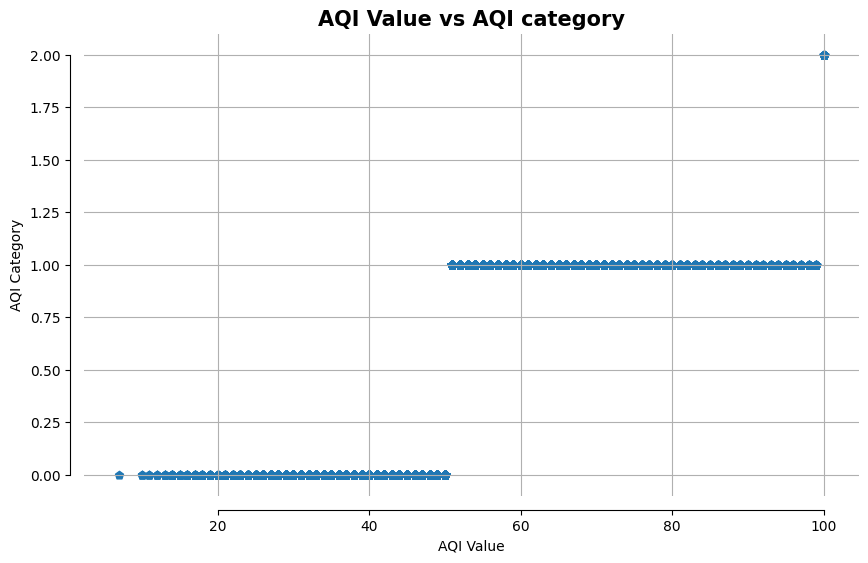

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(df1['AQI Value'],df1['AQI Category'],marker='p')
plt.title("AQI Value vs AQI category",fontsize=15, fontweight='bold')
plt.xlabel('AQI Value')
plt.ylabel('AQI Category')
plt.grid(True)
sns.despine(offset=10, trim=True)
plt.show()

In [77]:
#model building
model = LogisticRegression(multi_class='multinomial',max_iter=200, random_state=42)

In [78]:
#Traning the model
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

In [79]:
#Prediction
y_pred = model.predict(X_test)

In [80]:
Accuracy = accuracy_score(y_test, y_pred)
Accuracy

0.6143585719890153

In [81]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy: 61.44%


In [82]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1078  340    0]
 [ 642  488    0]
 [   1    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.76      0.69      1418
           1       0.59      0.43      0.50      1130
           2       0.00      0.00      0.00         1

    accuracy                           0.61      2549
   macro avg       0.41      0.40      0.40      2549
weighted avg       0.61      0.61      0.60      2549



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
Result = pd.DataFrame({'Actual_AQI_Category': y_test, 'Predicted_AQI_Category':y_pred })
Result.head()

,Actual_AQI_Category,Predicted_AQI_Category
21258,1,1
11607,1,0
19651,1,0
17676,0,0
21129,1,1


In [84]:
Result[(Result['Actual_AQI_Category']==0)& (Result['Predicted_AQI_Category']==1)]

,Actual_AQI_Category,Predicted_AQI_Category
2213,0,1
15758,0,1
4385,0,1
20458,0,1
15556,0,1
...,...,...
17590,0,1
21269,0,1
13075,0,1
88,0,1


In [85]:
category_map = {
    0: 'Good',
    1: 'Moderate',
    2: 'Unhealthy for Sensitive Groups'
}

# Apply map to actual & predicted columns
Result['Actual_Label'] = Result['Actual_AQI_Category'].map(category_map)
Result['Predicted_Label'] = Result['Predicted_AQI_Category'].map(category_map)

In [86]:
Result.head()

,Actual_AQI_Category,Predicted_AQI_Category,Actual_Label,Predicted_Label
21258,1,1,Moderate,Moderate
11607,1,0,Moderate,Good
19651,1,0,Moderate,Good
17676,0,0,Good,Good
21129,1,1,Moderate,Moderate


In [87]:
m = model.coef_[0][0]
c = model.intercept_[0]

print('Model coefficient:', m)
print('Model intrcept:', c)

Model coefficient: 0.22588632905903674
Model intrcept: 2.0987233330829977


In [88]:
# Predict probabilities
y_probaility = model.predict_proba(X_test)
y_probaility

array([[0.41646287, 0.58244899, 0.00108814],
       [0.63730359, 0.36173429, 0.00096212],
       [0.711269  , 0.2865267 , 0.0022043 ],
       ...,
       [0.61035805, 0.38820136, 0.00144059],
       [0.74540256, 0.25307836, 0.00151908],
       [0.39863328, 0.60029824, 0.00106847]])

In [89]:
Result['Prediction_Probaility'] = y_probaility[:,1]
Result.head()

,Actual_AQI_Category,Predicted_AQI_Category,Actual_Label,Predicted_Label,Prediction_Probaility
21258,1,1,Moderate,Moderate,0.582449
11607,1,0,Moderate,Good,0.361734
19651,1,0,Moderate,Good,0.286527
17676,0,0,Good,Good,0.426478
21129,1,1,Moderate,Moderate,0.681341


#***Decision Tree Model Building:***

In [90]:
depths = [2, 3, 4, 5, 10, None]
for depth in depths:
    print(f"\nDecision Tree with max_depth = {depth}")
    print("_"*35)

    #Model building
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    #Training the model
    clf.fit(X_train, y_train)
    #prediction
    y_pred = clf.predict(X_test)
    #model Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")


Decision Tree with max_depth = 2
___________________________________
Model Accuracy: 0.5951

Decision Tree with max_depth = 3
___________________________________
Model Accuracy: 0.6434

Decision Tree with max_depth = 4
___________________________________
Model Accuracy: 0.6454

Decision Tree with max_depth = 5
___________________________________
Model Accuracy: 0.6548

Decision Tree with max_depth = 10
___________________________________
Model Accuracy: 0.7226

Decision Tree with max_depth = None
___________________________________
Model Accuracy: 0.6952


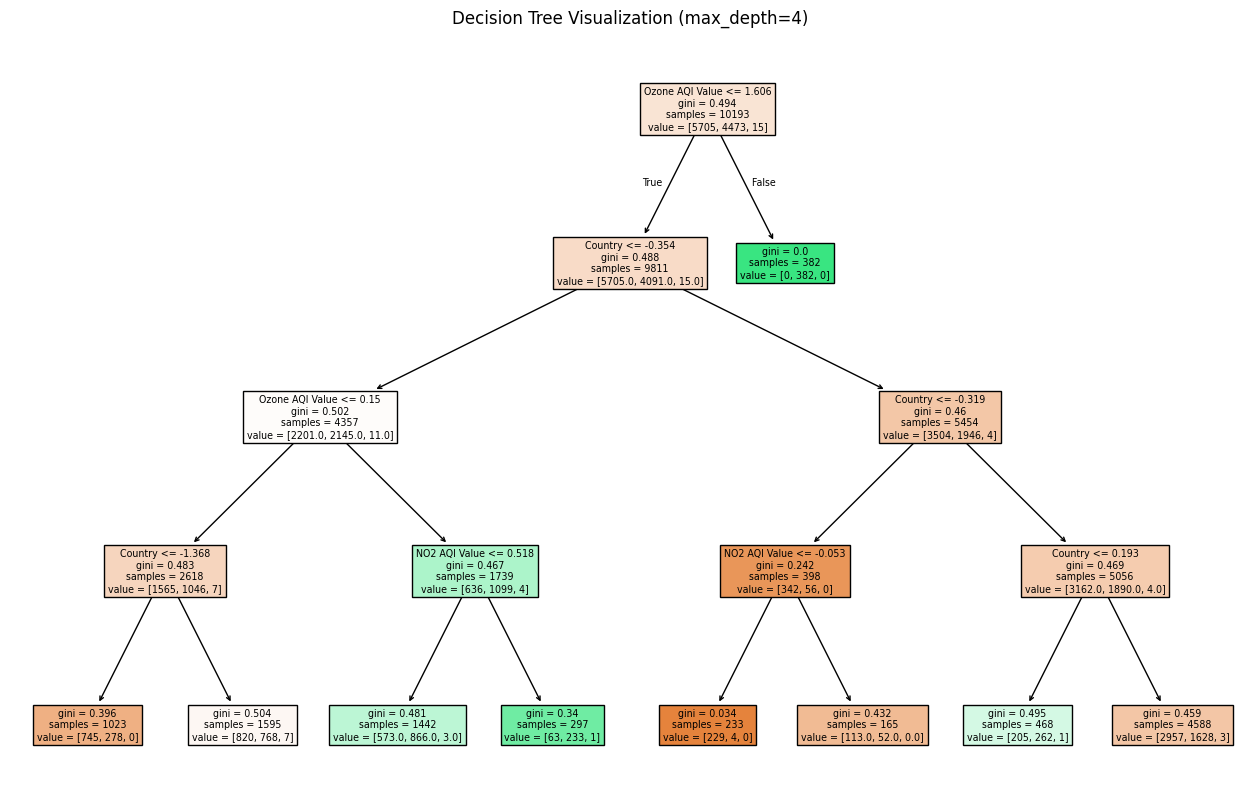

In [91]:
best_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
best_tree.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(best_tree, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization (max_depth=4)")
plt.show()

In [92]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1041  377    0]
 [ 398  731    1]
 [   1    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      1418
           1       0.66      0.65      0.65      1130
           2       0.00      0.00      0.00         1

    accuracy                           0.70      2549
   macro avg       0.46      0.46      0.46      2549
weighted avg       0.69      0.70      0.69      2549



#***K-Nearest Neighbors (KNN) Model Building:***

In [93]:
k_values = [1, 3, 5, 11]
accuracies = {}

for k in k_values:
    print(f"\nKNN with k = {k}")
    print("_"*20)
    #Model building
    knn = KNeighborsClassifier(n_neighbors=k)
    #Traing the model
    knn.fit(X_train, y_train)
    #prediction
    y_pred = knn.predict(X_test)

    #Model Accuracy score
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"Accuracy: {acc:.4f}")


KNN with k = 1
____________________
Accuracy: 0.6391

KNN with k = 3
____________________
Accuracy: 0.6457

KNN with k = 5
____________________
Accuracy: 0.6552

KNN with k = 11
____________________
Accuracy: 0.6732


In [94]:
print("\nK Value vs Accuracy")
for k, acc in accuracies.items():
    print(f"k = {k}: Accuracy = {acc:.4f}")

best_k = max(accuracies, key=accuracies.get)
print(f"\nBest k: {best_k} with Accuracy = {accuracies[best_k]:.4f}")


K Value vs Accuracy
k = 1: Accuracy = 0.6391
k = 3: Accuracy = 0.6457
k = 5: Accuracy = 0.6552
k = 11: Accuracy = 0.6732

Best k: 11 with Accuracy = 0.6732


In [95]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1117  301    0]
 [ 531  599    0]
 [   1    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      1418
           1       0.67      0.53      0.59      1130
           2       0.00      0.00      0.00         1

    accuracy                           0.67      2549
   macro avg       0.45      0.44      0.44      2549
weighted avg       0.67      0.67      0.67      2549



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#***XGBoost Classifier Model Building:***

In [96]:
#Model bulding
xgb_model = XGBRFClassifier(random_state=42)
#Traning the Model
xgb_model.fit(X_train, y_train)
#Prediction
xgb_preds = xgb_model.predict(X_test)
#Accuracy score
print(f"Accuracy:{accuracy_score(y_test,xgb_preds):.4f}")
print("-"*35)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:0.6956
-----------------------------------
Confusion Matrix:
 [[1117  301    0]
 [ 531  599    0]
 [   1    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      1418
           1       0.67      0.53      0.59      1130
           2       0.00      0.00      0.00         1

    accuracy                           0.67      2549
   macro avg       0.45      0.44      0.44      2549
weighted avg       0.67      0.67      0.67      2549



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#***Support Vector Machine (SVM) Model Building:***

In [97]:
#Model building
svm_model = SVC(random_state=42)
#Traning the model
svm_model.fit(X_train, y_train)
#Prediction
y_pred = svm_model.predict(X_test)
#Model Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-"*35)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6445664966653589
-----------------------------------
Confusion Matrix:
 [[1289  129    0]
 [ 776  354    0]
 [   1    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.91      0.74      1418
           1       0.73      0.31      0.44      1130
           2       0.00      0.00      0.00         1

    accuracy                           0.64      2549
   macro avg       0.45      0.41      0.39      2549
weighted avg       0.67      0.64      0.61      2549



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Stage 3

#***Model Evaluation and Comparison:***

In [98]:
data = {"Model":["LogisticRegression","Decision Tree","K-Nearest Neighbors","XGBoost Classifier","SupportVectorMachine"],
        "Accuracy":[0.6143,0.7226,0.6732,0.6956,0.6445],
        "F1 Score":[0.69,0.73,0.73, 0.73, 0.74]}

In [99]:
final_results = pd.DataFrame(data)
final_results

,Model,Accuracy,F1 Score
0,LogisticRegression,0.6143,0.69
1,Decision Tree,0.7226,0.73
2,K-Nearest Neighbors,0.6732,0.73
3,XGBoost Classifier,0.6956,0.73
4,SupportVectorMachine,0.6445,0.74



#interpretation:

- Logistic Regression → 61.43% (lowest performance, struggles with complex patterns)

-    Decision Tree → 72.26% (highest accuracy, good for interpretability)

- K-Nearest Neighbors (KNN) → 67.32% (moderate performance, depends on distance metric and data scaling)

- XGBoost Classifier → 69.56% (strong boosting model, better than most except Decision Tree)

- Support Vector Machine (SVM) → 64.45% (better than Logistic Regression but weaker than tree-based models)
____

- Best model → Decision Tree (72.26%)

- Second best → XGBoost (69.56%), which usually generalizes better than Decision Tree.

- Weaker models → Logistic Regression (61.43%) and SVM (64.45%), possibly due to nonlinear patterns in the data.

- KNN sits in the middle (67.32%), but may improve with feature scaling and tuning k.

/tmp/ipython-input-3485494725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_results, x ="Model", y="Accuracy", palette="tab10")


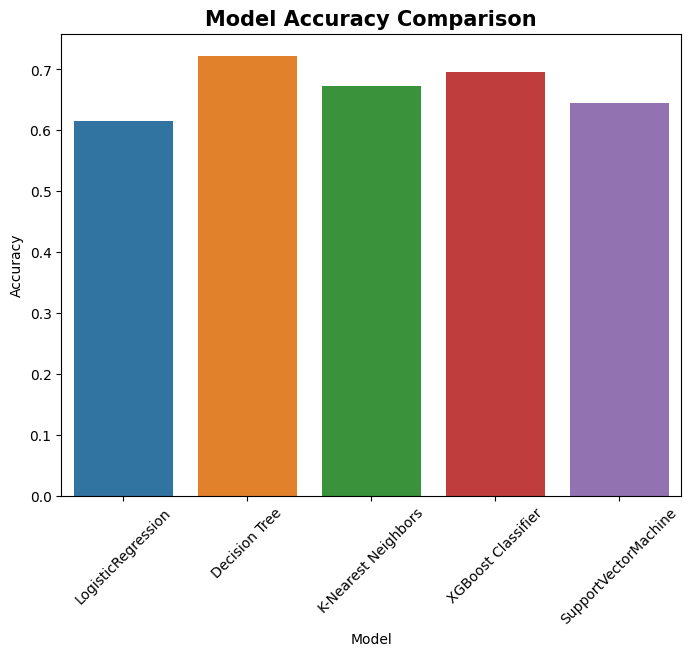

In [100]:
plt.figure(figsize=(8,6))
sns.barplot(data=final_results, x ="Model", y="Accuracy", palette="tab10")
plt.title("Model Accuracy Comparison",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

#Hyperparameter Tuning – GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best Score:", grid_dt.best_score_)

Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.7220628557649871


In [103]:
# XGBoost
xgb = XGBRFClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", grid_xgb.best_params_)
print("Best Score:", grid_xgb.best_score_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:31:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Best Score: 0.7073494242063857


In [105]:
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


***Rebuild Each Model with Best Parameters***
---

In [119]:
# Decision Tree with best params
best_dt = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)
best_dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [120]:
# XGBoost with best params
best_xgb = XGBRFClassifier(**grid_xgb.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:34:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=1.0, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric='logloss', feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.01, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob', ...)

***Evaluate Tuned Models***
---

In [122]:
models = {
    "Decision Tree": best_dt,
    "XGBoost": best_xgb
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": acc, "F1-Score": f1}

print(results)


{'Decision Tree': {'Accuracy': 0.719890153001177, 'F1-Score': 0.7186711747659119}, 'XGBoost': {'Accuracy': 0.7116516280894468, 'F1-Score': 0.6972144411257938}}


In [127]:
Tuning_result = pd.DataFrame(results)
Tuning_result

,Decision Tree,XGBoost
Accuracy,0.719890,0.711652
F1-Score,0.718671,0.697214


***Understanding the parameters***
----
***Decision Tree***
- 'criterion': ['gini', 'entropy']

    'max_depth': [3, 5, 10, None]

    'min_samples_split': [2, 5, 10]

    'min_samples_leaf': [1, 2, 5]
- Best score is 0.722063
-  in the we do Hyperparameter Tuning use GridSearchCV
 Decision Tree best score was 0.7220

***XGBoost***
-  'n_estimators': [50, 100, 200]

    'max_depth': [3, 5, 7]

    'learning_rate': [0.01, 0.1, 0.2]

- Best score is 0.707349

-  in the we do Hyperparameter Tuning use GridSearchCV
XGBoost best score was 0.7073

#***Project Documentation : Project Report***

##***1. Project Overview***

*We are trying to predict the global air pollution levels using different models. We used features like Country,	City,CO AQI Value,Ozone AQI Value,NO2 AQI Value. We tested many models and tuned them to check which one gives the best result.*
##***2. Dataset Details***
***Features used:***
- Country
- City
- CO AQI Value
- Ozone AQI Value
- NO2 AQI Value
- PM2.5 AQI Value

***Target:***
- AQI Category

***Preprocessing:***

- Label encoding for categorical columns.
- StandardScaler used for scaling.
- Split data into train and test (80%-20%),

##***3. Model Results***
| Model              | Accuracy | F1 Score   |
| -----------------  | -------- | ------
| LogisticRegression |	0.6143	|   0.69
|	Decision Tree	     |  0.7226	|   0.73
|K-Nearest Neighbors |	0.6732	|   0.73
|XGBoost Classifier	 | 0.6956	  |  0.73
|SupportVectorMachine|	0.6445	|   0.74

>Best model → Decision Tree (72.26%)

###  ***4. GridSearchCV – Hyperparameter Tuning***
**Decision Tree:**

Best parameter

'criterion': ['gini', 'entropy']

'max_depth': [3, 5, 10, None]

Best score: *0.722063*

**XGBoost**

Best parameter

'n_estimators': [50, 100, 200]

'max_depth': [3, 5, 7]

'learning_rate': [0.01, 0.1, 0.2]

Best score:*0.707349*

###***5.Real-World Benefits:***
- **Health Protection –**
Helps people avoid exposure to polluted air by giving early warnings, reducing risks like asthma, lung disease, and heart problems.

- **Government & Policy Support –**
 Assists pollution control boards and city authorities in making data-driven decisions (e.g., traffic control, industrial regulation).

- **Smart City Integration –**
Can be connected with IoT sensors for real-time air quality monitoring in smart cities.

- **Environmental Awareness –** Spreads awareness about pollution and motivates people to adopt eco-friendly practices.

- **Mobile & Web Applications –** Can be used in apps or websites to give daily air quality updates and safety recommendations to the public.

###  ***6. Insights:***
- Model is Accuracy was 0.7226
- using tuning score was increse in XGBoost model
- more feature are add maybe model perfomance increse



#***Testing work***

In [106]:
newdf = aqi_values.copy()

In [107]:
newdf.corr()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.430602,0.405310,0.231758,0.984327
CO AQI Value,0.430602,1.000000,0.145724,0.488092,0.438557
Ozone AQI Value,0.405310,0.145724,1.000000,-0.181818,0.339887
NO2 AQI Value,0.231758,0.488092,-0.181818,1.000000,0.260127
PM2.5 AQI Value,0.984327,0.438557,0.339887,0.260127,1.000000


In [108]:
df1.shape

(12742, 12)

In [109]:
X_test.shape

(2549, 5)

In [110]:
type(X_test)

numpy.ndarray

In [111]:
X_test

array([[-0.37738549,  0.21140128,  0.        ,  0.87797854,  0.23243429],
       [ 1.36990287, -1.41203334,  0.        ,  0.10712773, -0.33914658],
       [-0.72684316,  0.35446884,  0.        , -1.09197352, -0.91072746],
       ...,
       [-0.49387138,  1.11840595,  0.        ,  0.02147764, -0.91072746],
       [ 0.67098753, -1.26214003,  0.        , -0.92067334, -0.91072746],
       [-0.37738549, -0.78188078,  0.        ,  1.2205789 , -0.33914658]])

In [112]:
y_pred2 = model.predict(X_test)

In [113]:
y_pred2

array([1, 0, 0, ..., 0, 0, 1])

In [114]:
newdf=X_test
newdf

array([[-0.37738549,  0.21140128,  0.        ,  0.87797854,  0.23243429],
       [ 1.36990287, -1.41203334,  0.        ,  0.10712773, -0.33914658],
       [-0.72684316,  0.35446884,  0.        , -1.09197352, -0.91072746],
       ...,
       [-0.49387138,  1.11840595,  0.        ,  0.02147764, -0.91072746],
       [ 0.67098753, -1.26214003,  0.        , -0.92067334, -0.91072746],
       [-0.37738549, -0.78188078,  0.        ,  1.2205789 , -0.33914658]])

In [115]:
y_test

,AQI Category
21258,1
11607,1
19651,1
17676,0
21129,1
...,...
10681,1
16281,1
19885,1
1534,0


In [116]:
New_y_pred = model.predict(newdf)

In [117]:
Testing_data =pd.DataFrame({"Testing y_test":y_pred,
                             "Result prediction":New_y_pred})
Testing_data.head()

,Testing y_test,Result prediction
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
